In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">
Our final scores: accuracy=0.75, f1=0.53
    
## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_1. I am choosing Option 1: Classification problem of predicting whether a credit card client will default or not._ \
_2. The data we have contains information about clients' Amount of given credit (LIMIT_BAL), Gender (SEX), Education level (EDUCATION), Marital status (MARRIAGE), Repayment status (PAY_N; N = [0, 6]), and a total of 25 variables, 1 of which is ID and 1 of which is our target variable default.payment.next.month, which is binary, 1=yes and 0=no._

In [3]:
#3.
data_df = pd.read_csv("data/UCI_Credit_Card.csv")
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(
    data_df, test_size=0.3, random_state=123
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)


#### **Checking for nulls in data_df**

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

In [6]:
train_df.isna().describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,...,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,...,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000


In [7]:
train_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
cat_feats = ['SEX', 'EDUCATION', 'MARRIAGE']
num_feats = ['LIMIT_BAL', 'AGE', 'default.payment.next.month']

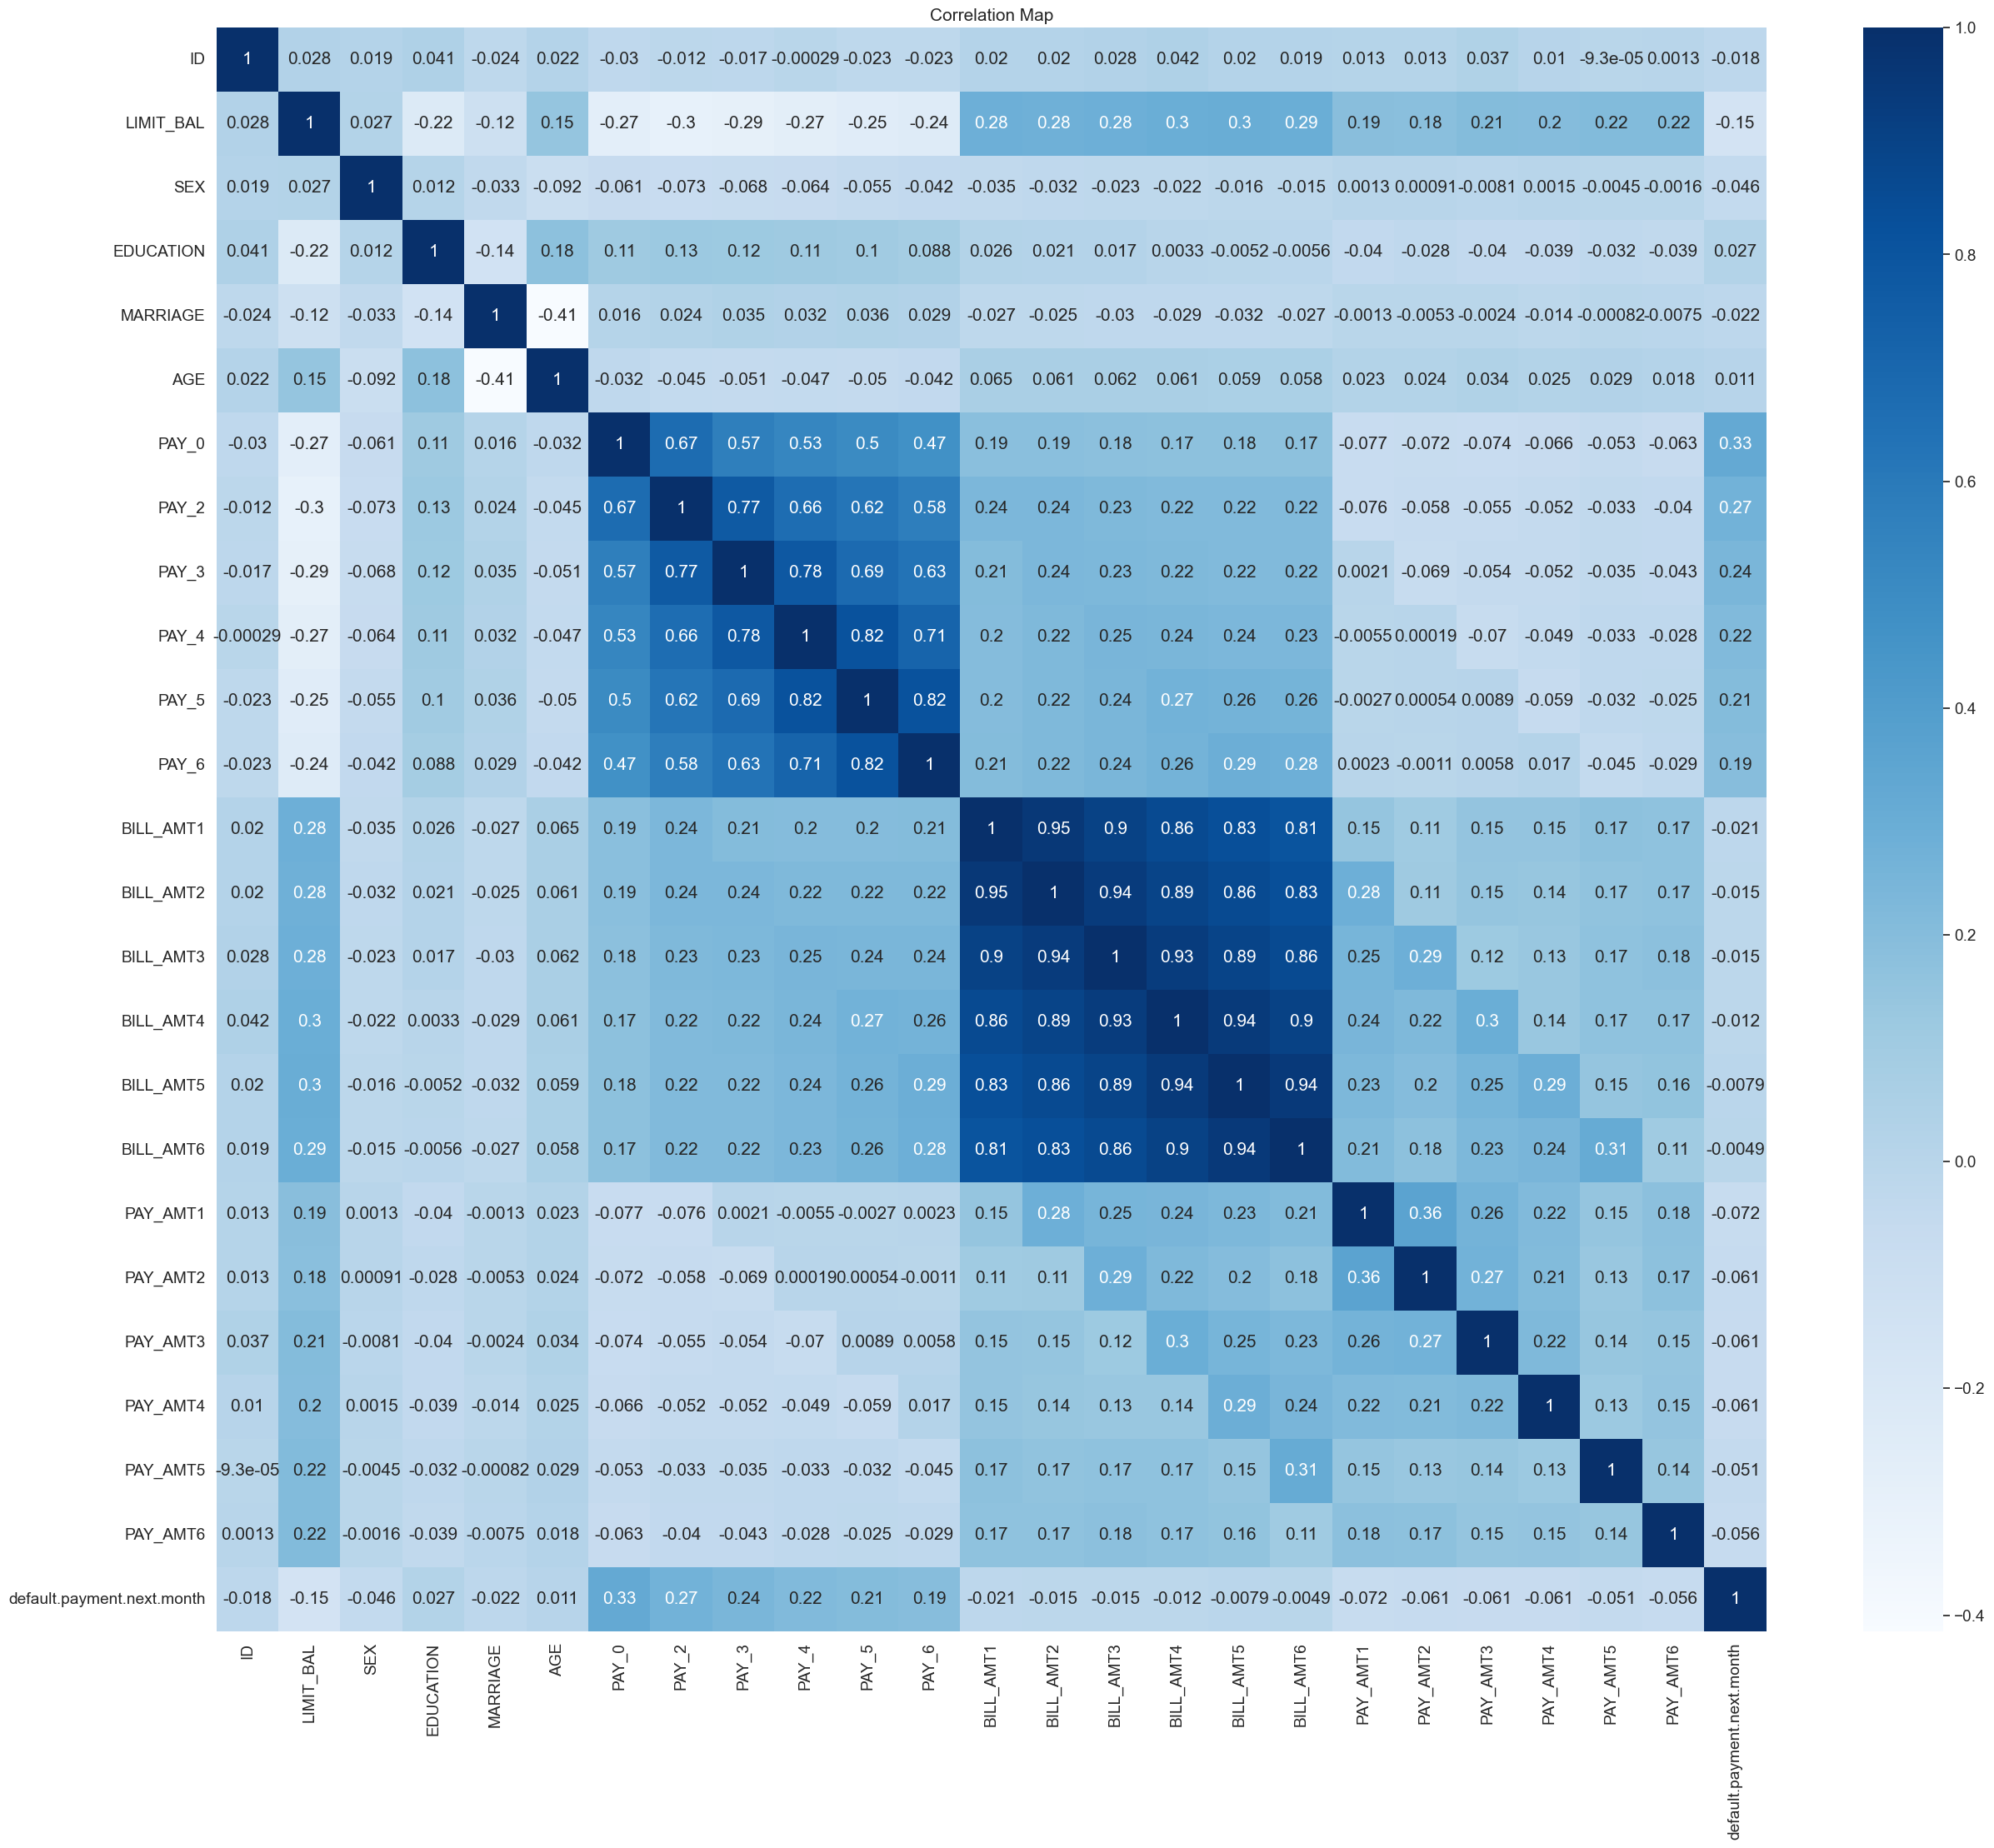

In [9]:
corr_map = train_df.corr()
plt.figure(figsize=(30,25))
sns.set(font_scale=1.25)
sns.heatmap(corr_map, annot=True, cmap=plt.cm.Blues);
plt.title('Correlation Map')
plt.show()

From the bottom row in the correlation map above, it looks like the features that are most correlated to our target variable `default.payment.next.month` are `PAY_0`, `PAY_1`,..., `PAY_6`.

In [10]:
train_df['default.payment.next.month'].value_counts()

default.payment.next.month
0    16312
1     4688
Name: count, dtype: int64

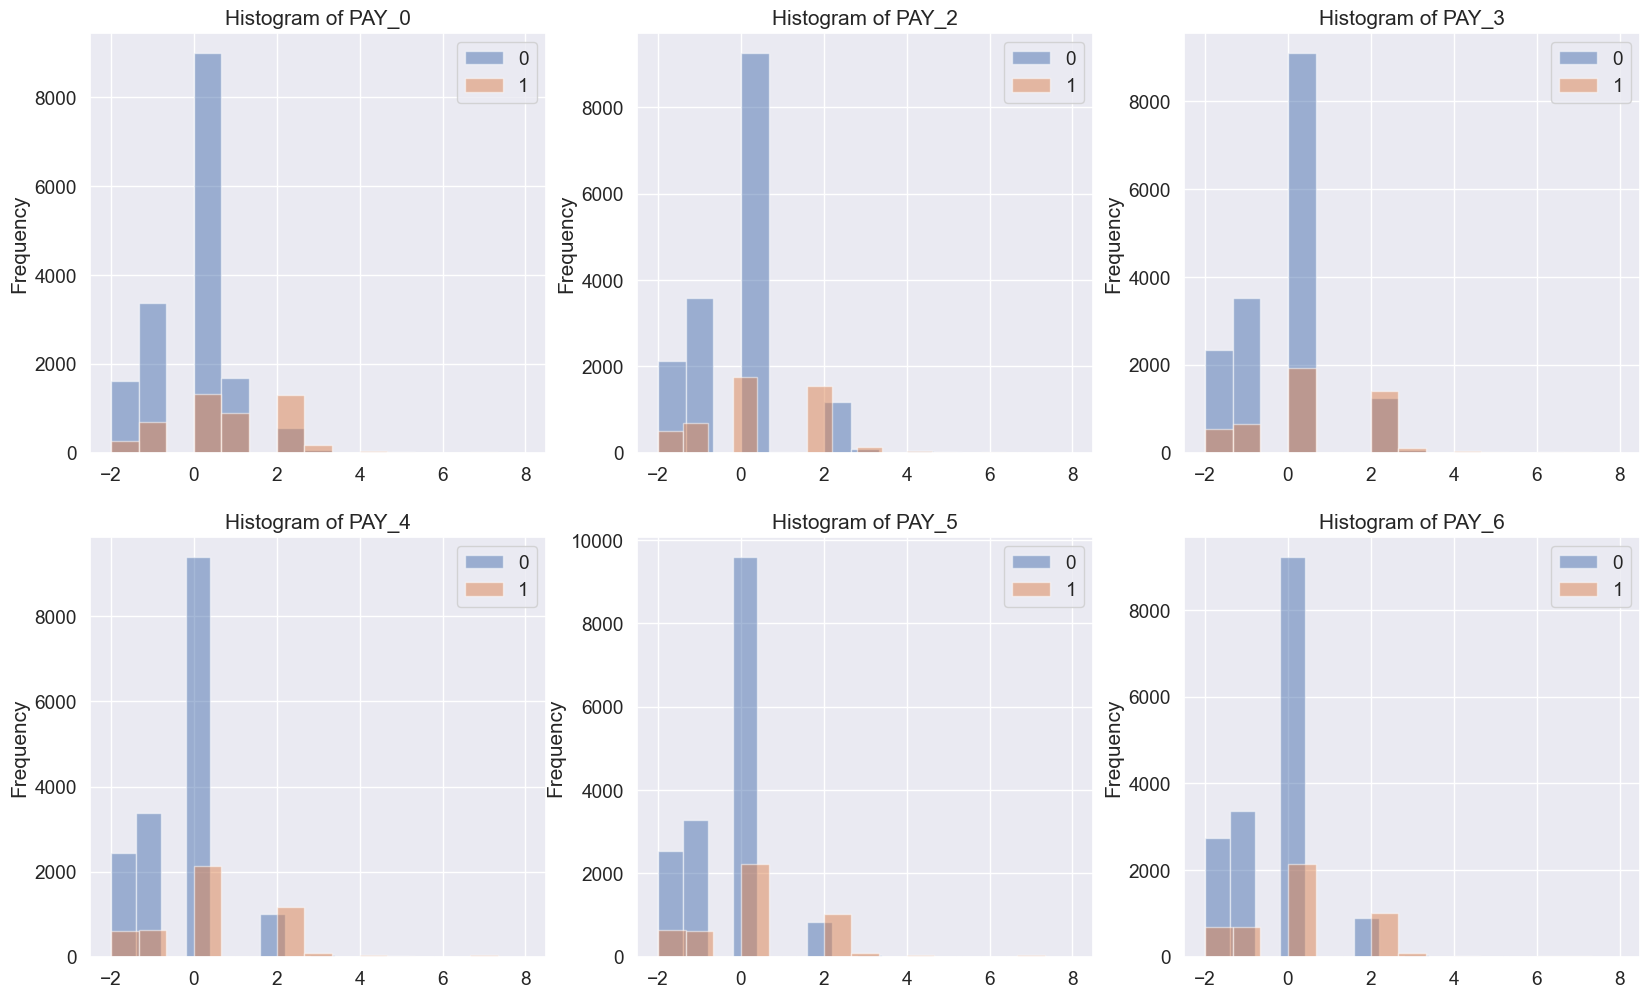

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i, feat in enumerate(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):
    row = i // 3  
    col = i % 3 
    for val, group in train_df.groupby('default.payment.next.month'):
        group[feat].plot.hist(
            bins=15,
            alpha=0.5, 
            ax=axes[row, col], 
            legend=True,
            title=f"Histogram of {feat}",
            label=f"{val}"
        )
plt.show()

In the histogram plots above, we notice many entries lie in the bins at −1 or 0, indicating that a large portion of people in each group are either on-time (or ahead) in their payments and very few people were extremely delayed since there aren't many with value over or equal to 2 or 3. Apart from that, the shape of the distributions is fairly similar across the six subplots.

I observed that there are no missing values in the data, which is a good thing. Some features are ordinally encoded while some are binary. Additionally, some feature have a different scale than others. Finally, `PAY_*` features seem to have highest correlation to our target.

We have a binary classification problem with some class imbalance in target (fewer people default than not), so `sklearn` will not be much useful. This means that the most appropriate metrics would be Precision, Recall, and F1 Score.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Create 6 new features that aim to capture customers’ payment behavior over time.

`avg_pay_time`: Computes the average of the six payment status variables (`PAY_0`, `PAY_2`,..., `PAY_6`). This gives an overall sense of a customer's payment timeliness.

`has_delay`: Counts how many of the six months have a payment status greater than 0 (Positive means delayed payment).

`avg_bill`: Averages the six bill amount variables (`BILL_AMT1`, `BILL_AMT2`,..., `BILL_AMT6`) to capture a typical monthly bill.

`avg_pay_amt`: Averages the six payment amount variables (`PAY_AMT1`, `PAY_AMT2`,..., `PAY_AMT6`), reflecting a typical monthly payment.

`utilization`: The ratio of avg_bill to LIMIT_BAL (credit limit). This shows how much of the available credit is typically used.

`payment_ratio`: The ratio of `avg_pay_amt` to `avg_bill`. This tells us the proportion of the bill that is usually paid.

In [12]:
for df in [train_df, test_df]: # Turn 5,6 to NaN in 'EDUCATION' COLUMN (To impute in future step); should be part of preprocessing
    df['EDUCATION'] = df['EDUCATION'].replace([5, 6], np.nan) 
    df['EDUCATION'] = df['EDUCATION'].replace([0], np.nan) 
    df['has_delay'] = ((df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1) > 0).astype(int) #binary
    df['max_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1) #numerical
    
    df['avg_pay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1) #numerical
    df['avg_bill'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) #numerical
    df['avg_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1) #numerical

    df['utilization'] = df['avg_bill'] / df['LIMIT_BAL'] #numerical
    df['payment_ratio'] = df['avg_pay_amt'] / df['avg_bill'].apply(lambda x: 1 if x == 0 else x) #numerical

new_num_feats = ['avg_pay_time', 'has_delay', 'avg_bill', 'avg_pay_amt', 'utilization', 'payment_ratio']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

## 

**Remove unknown in EDUCATION feature (to impute later)**

In [13]:
for df in [train_df, test_df]: 
    # Turn 5,6 to NaN in 'EDUCATION' COLUMN (To impute later)
    df['EDUCATION'] = df['EDUCATION'].replace([5, 6], np.nan) 
    df['EDUCATION'] = df['EDUCATION'].replace([0], np.nan) 

print(train_df['EDUCATION'].head())
print(test_df['EDUCATION'].unique())

16395    1.0
21448    1.0
20034    3.0
25755    2.0
1438     2.0
Name: EDUCATION, dtype: float64
[ 2.  3.  1. nan  4.]


#### **Features**

In [14]:
drop_features = ['ID', 'SEX']

num_feats = numeric_features = ['LIMIT_BAL', 'AGE',
                    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                    'max_delay', 'avg_pay', 'avg_bill', 'avg_pay_amt', 'utilization', 'payment_ratio']

cat_feats = ['MARRIAGE']
binary_features = ['has_delay']
ordinal_features = ['EDUCATION']

target_column = 'default.payment.next.month'

#### **Ordinal Order**
Flipping education order to make the significance values actually make sense (previously, highschool is considered better than university which is obviously false)

In [15]:
education_order = {
    1: 4,  # Graduate -> 4
    2: 3,  # University -> 3
    3: 2,  # High School -> 2
    4: 1   # Lower than highschool -> 1
}

train_df['EDUCATION'] = train_df['EDUCATION'].map(education_order)
test_df['EDUCATION'] = test_df['EDUCATION'].map(education_order)

assert set(education_order.values()) == set(train_df["EDUCATION"].dropna().unique())
assert set(education_order.values()) == set(test_df["EDUCATION"].dropna().unique())

#### **Preprocessing** (no need for imputation for features other than Ordinal because 

In [16]:
numeric_transformer = StandardScaler()

ordinal_transformer = make_pipeline(
    SimpleImputer(strategy="median"), #Impute away NaN, don't need OrdinalEncoding since already in numeric form
)

binary_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop="if_binary", dtype=int),
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

preprocessor = make_column_transformer(
    (numeric_transformer, num_feats),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, cat_feats),
    ("drop", drop_features),
)

In [17]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
                                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                  'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6', 'max_delay',
                                  'avg_pay', 'avg_bill', 'avg_pay_amt',
                                  'utilization', 'payment_ratio'])...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>))]),
                                 ['has_delay']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MARRIAGE']),
                                ('drop', 'drop', ['ID', 'SEX'])])

#### **Class Imbalance Check**

In [18]:
train_df[target_column].value_counts(normalize=True)

default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64

**As we can see there is obvious class imbalance**

#### **Split data into X,Y** (based on target_column)

In [19]:
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

**No need for LabelEncoder because all categorical variables are already in numerical**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
base_results = {}

#### **`DummyClassifier`** baseline

In [21]:
dummy = DummyClassifier() #most_frequent
cv_results = cross_validate(
        dummy, 
        X_train,
        y_train,
        cv=5,
        scoring=['accuracy', 'f1'],
        return_train_score=True
)
base_results['dummy'] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean()
}

#### **`DecisionTreeClassifier`** baseline

In [22]:
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))
dummy = DummyClassifier() #most_frequent
cv_results = cross_validate(
        pipe_dt, 
        X_train,
        y_train,
        cv=5,
        scoring=['accuracy', 'f1'],
        return_train_score=True
)
base_results['decision tree'] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean()
}

### **Results**

In [23]:
pd.DataFrame(base_results).T

,train_accuracy,train_std,cv_accuracy,cv_std,fit_time,score_time,train_f1,test_f1
dummy,0.776762,0.000029,0.776762,0.000117,0.003477,0.003287,0.000000,0.000000
decision tree,0.999036,0.000138,0.727762,0.005712,0.474053,0.011398,0.997835,0.410553


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [24]:
linear_models={}
linear_results = {}

#### **`LogisticRegression`** 

In [25]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

results_dict = {}

for C in C_values:
    lr_pipe = make_pipeline(
        preprocessor,
        LogisticRegression(C=C, random_state=123, max_iter=500)
    )
    
    cv_results = cross_validate(
        lr_pipe, 
        X_train,
        y_train,
        cv=5,
        scoring=['accuracy', 'f1'],
        return_train_score=True
    )
    
    results_dict[C] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean(),
    }
results_df = pd.DataFrame(results_dict).T
results_df

,train_accuracy,train_std,cv_accuracy,cv_std,fit_time,score_time,train_f1,test_f1
0.001,0.800464,0.000997,0.800238,0.003364,0.048691,0.012446,0.280623,0.279644
0.010,0.811536,0.000841,0.809857,0.001949,0.061816,0.013062,0.397043,0.391153
0.100,0.810976,0.001434,0.810667,0.004779,0.087419,0.012720,0.423342,0.423814
1.000,0.810762,0.001182,0.810000,0.005249,0.093838,0.013113,0.425699,0.424780
10.000,0.810821,0.001211,0.810286,0.005293,0.102953,0.013996,0.426732,0.425962
100.000,0.810774,0.001212,0.810143,0.005196,0.109551,0.013374,0.426755,0.425445
1000.000,0.810750,0.001163,0.810095,0.005229,0.102799,0.012522,0.426560,0.425386


The best C value appears to be 1 with cv score 0.81 and f1 score 0.42 (no signs of overfitting)

#### **`Linear SVM`**

In [26]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

results_dict = {}

for C in C_values:
    svm_pipe = make_pipeline(
        preprocessor,
        SVC(kernel="linear", C=C, random_state=123, max_iter=500)
    )
    
    cv_results = cross_validate(
        svm_pipe, 
        X_train,
        y_train,
        cv=5,
        scoring=['accuracy', 'f1'],
        return_train_score=True
    )
    
    results_dict[C] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean(),
    }
results_df = pd.DataFrame(results_dict).T

C:\Users\jimmy\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jimmy\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jimmy\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jimmy\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\jimmy\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\svm\_ba

In [27]:
results_df

,train_accuracy,train_std,cv_accuracy,cv_std,fit_time,score_time,train_f1,test_f1
0.001,0.223464,0.000058,0.223524,0.000436,0.397867,0.077624,0.365063,0.365081
0.010,0.225179,0.001772,0.225095,0.001318,0.378388,0.077381,0.365427,0.365254
0.100,0.232143,0.005489,0.231905,0.006755,0.362623,0.075030,0.366447,0.366516
1.000,0.322024,0.079848,0.321476,0.080003,0.260871,0.055683,0.333022,0.336142
10.000,0.379048,0.043456,0.381905,0.046270,0.206306,0.043969,0.311574,0.314388
100.000,0.383583,0.134974,0.380143,0.135552,0.193678,0.042605,0.343617,0.342529
1000.000,0.268738,0.030637,0.266190,0.032547,0.196901,0.041722,0.342319,0.338848


> *Note: We had to set max_iter since without it the loop is stuck on run*

The best C value appears to be 0.01 with cv score 0.81 and f1 score 0.42  (no signs of overfitting)

#### **Result**

There is not much difference between LogisticRegression(C=1) and LinearSVM(C=0.01), considering both cv and f1 score.
#### **However, LogisticRegression is far faster than LinearSVM, and therefore it is better to be used.**
It is possible for LinearSVM to give more accurate results if max_iter was higher, but it will make the code take forever to run, and the current max_iter is already taking far longer than LogisticRegression

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Let's compare results of Random Forest, Gradient Boosting and SVM:_
1. SVM:
- Capable of capturing complex decision boundaries but more computationally intensive in training.

2. Gradient Boosting:
- Can achieve the highest CV accuracy and F1 scores if tuned well but high training time.

3. Random Forest:
- Captures nonlinear relationships and feature interactions well without much tuning but easy to overfit.

In [28]:
svm_pipe = make_pipeline(preprocessor, SVC(random_state=123))
catboost_pipe = make_pipeline(preprocessor, CatBoostClassifier(iterations=150, random_state=123, verbose=0))
rf_pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=123))

In [29]:
models = {
    'Random Forest': rf_pipe,
    'CatBoost': catboost_pipe,
    'SVM': svm_pipe
}

In [30]:
model_results = {}

for name, model in models.items():
    cv_results = cross_validate(
        model,
        X_train,
        y_train,
        cv=5,
        scoring=['accuracy', 'f1'],
        return_train_score=True,
        n_jobs=-1
    )

    model_results[name] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean()
    }

results_df = pd.DataFrame(model_results).T
results_df

,train_accuracy,train_std,cv_accuracy,cv_std,fit_time,score_time,train_f1,test_f1
Random Forest,0.999012,0.000117,0.815619,0.005753,6.553713,0.090301,0.997786,0.480445
CatBoost,0.860024,0.001266,0.815429,0.004284,2.727070,0.073663,0.604320,0.470481
SVM,0.823012,0.001166,0.818667,0.003817,15.320050,5.501620,0.473118,0.459555


1. CatBoost
    - Fastest of the 3.
    - 2nd highest cross-validation score.
<br>
2. Random Forest
    - 2nd fastest of the 3.
    - Likely overfitting, considering the large difference between training and cross-validation scores.
    - Lowest cross-validation score, but still greater than 80% so it's acceptable.
<br>
3. SVM
    - Slowest of the 3.
    - Highest cross-validation score.

- F1 score for all 3 is 46 to 47% which is on the lower end.
- All of them are performing with nearly similar accuracy.
- CatBoost seems to be the best in terms of speed and accuracy trade-off.
    - CV score of 81%
    - f1 score of 0.47

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Using `RFECV`._

In [31]:
rfe_results={}

# Assuming X_train is a DataFrame
X_train_scaled = preprocessor.fit_transform(X_train)

# If used a ColumnTransformer, retrieve the column names after transformation
if hasattr(preprocessor, 'get_feature_names_out'):
    transformed_columns = preprocessor.get_feature_names_out()
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=transformed_columns)
else:
    # If no column names, assign default names or manual names
    X_train_scaled = pd.DataFrame(X_train_scaled)


#### **`Logistic Regression`** (Best Linear)

In [32]:
rfelr_pipe = make_pipeline(
        StandardScaler(),
        RFECV(estimator=LogisticRegression(max_iter=2000),
              step=1,
              scoring='accuracy',
              cv=5,
              n_jobs=-1,
              importance_getter='auto'),
        LogisticRegression(C=1, random_state=123, max_iter=500)
    )  

cv_results = cross_validate(
        rfelr_pipe,
        X_train_scaled,
        y_train,
        cv=5,                
        scoring=['accuracy', 'f1'],
        return_train_score=True,
        n_jobs=-1
    )

rfe_results['LogisticRegression rfe'] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean(),
}

#### **`CatBoost`** (Best Non-Linear)

In [33]:
rfecat_pipe = make_pipeline(
        StandardScaler(),
        RFECV(estimator=LogisticRegression(max_iter=2000),
              step=1,
              scoring='accuracy',
              cv=5,
              n_jobs=-1,
              importance_getter='auto'),
        CatBoostClassifier(iterations=200, random_state=123, verbose=0, auto_class_weights='Balanced')
    )  

cv_results = cross_validate(
        rfecat_pipe,
        X_train_scaled,
        y_train,
        cv=5,                
        scoring=['accuracy', 'f1'],
        return_train_score=True,
        n_jobs=-1
    )

rfe_results['CatBoost rfe'] = {
        'train_accuracy': cv_results['train_accuracy'].mean(),
        'train_std': cv_results['train_accuracy'].std(),
        'cv_accuracy': cv_results['test_accuracy'].mean(),
        'cv_std': cv_results['test_accuracy'].std(),
        'fit_time': cv_results['fit_time'].mean(),
        'score_time': cv_results['score_time'].mean(),
        'train_f1': cv_results['train_f1'].mean(),
        'test_f1': cv_results['test_f1'].mean(),
}

In [34]:
rfe_results_df = pd.DataFrame(rfe_results).T
rfe_results_df

,train_accuracy,train_std,cv_accuracy,cv_std,fit_time,score_time,train_f1,test_f1
LogisticRegression rfe,0.813893,0.001739,0.813238,0.003709,5.238356,0.007858,0.420399,0.419063
CatBoost rfe,0.787012,0.004225,0.761905,0.006990,7.326875,0.013632,0.586241,0.535909


**We achieved worse results**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

> NOTE: use class_weight="balanced" because we prioritize recall over precision

#### **`RandomizedSearchCV`** Optimization

**CatBoost**

In [35]:
pipe_cb = Pipeline([
    ('scale', StandardScaler()),
    ('cb',CatBoostClassifier(random_state=123, verbose=0, auto_class_weights='Balanced'))
])

param_dist_cb = {
    'cb__iterations': [50, 100, 150],
    'cb__depth': [3, 4, 5, 6],
    'cb__learning_rate': [0.01, 0.05, 0.1],
    'cb__l2_leaf_reg': [1, 3, 5, 7]
}

rand_cb_rscv = RandomizedSearchCV(pipe_cb, param_dist_cb, 
                               n_iter=10, cv=5, scoring='f1', n_jobs=-1,
                               random_state=123, return_train_score=True)
rand_cb_rscv.fit(X_train_scaled, y_train)

print(rand_cb_rscv.best_params_)
print(rand_cb_rscv.best_score_)

{'cb__learning_rate': 0.1, 'cb__l2_leaf_reg': 3, 'cb__iterations': 150, 'cb__depth': 5}
0.5432212830778365


In [36]:
pipe_lr = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

param_dist_lr = {
    "lr__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

rand_lr = RandomizedSearchCV(pipe_lr, param_dist_lr, 
                               n_iter=10, cv=5, scoring='f1', n_jobs=-1,
                               random_state=123, return_train_score=True)
rand_lr.fit(X_train_scaled, y_train)

print(rand_lr.best_params_)
print(rand_lr.best_score_)

C:\Users\jimmy\miniconda3\envs\cpsc330\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'lr__C': 0.01}
0.5231292487321296


####  **`BayesianSearchCV`** Optimization

In [37]:
pipe_cb = Pipeline([
    ('scale', StandardScaler()),
    ('cb',CatBoostClassifier(random_state=123, verbose=0, auto_class_weights='Balanced'))
])

param_dist_cb = {
    'cb__iterations': [50, 100, 150],
    'cb__depth': [3, 4, 5, 6],
    'cb__learning_rate': [0.01, 0.05, 0.1],
    'cb__l2_leaf_reg': [1, 3, 5, 7]
}

rand_cb_bay = BayesSearchCV(pipe_cb, param_dist_cb, 
                               n_iter=10, cv=5, scoring='f1', n_jobs=-1,
                               random_state=123, return_train_score=True)
rand_cb_bay.fit(X_train_scaled, y_train)

print(rand_cb_bay.best_params_)
print(rand_cb_bay.best_score_)

OrderedDict({'cb__depth': 6, 'cb__iterations': 100, 'cb__l2_leaf_reg': 1, 'cb__learning_rate': 0.05})
0.5419774278102404


In [38]:
pipe_lr = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

param_dist_lr = {
    "lr__C": [0.001, 0.01, 0.1, 1.0, 10, 100]
}

rand_lr = BayesSearchCV(pipe_lr, param_dist_lr, 
                               n_iter=10, cv=5, scoring='f1', n_jobs=-1,
                               random_state=123, return_train_score=True)
rand_lr.fit(X_train_scaled, y_train)

print(rand_lr.best_params_)
print(rand_lr.best_score_)

OrderedDict({'lr__C': 0.01})
0.5231292487321296


### CatBoost RandomizedSearchCV
- Used `RandomizedSearchCV` to find optimal values for `n_estimators`, `depth`, `learning_rate`, `l2_leaf_reg`
- Best Hyperparameters:
    - `depth`: 5, `iterations`: 150, `l2_leaf_reg`: 3, `learning_rate`: 0.1

### CatBoost BayesSearchCV (scikit-optimize)
- Used `BayesSearchCV` to find optimal values for `n_estimators`, `depth`, `learning_rate`, `l2_leaf_reg`
- Best Hyperparameters:
    - `depth`: 6, `iterations`: 100, `l2_leaf_reg`: 1, `learning_rate`: 0.05

### LogisticRegression RandomizedSearchCV
- Used `RandomizedSearchCV` to find optimal value for `C`
- Best Hyperparameter:
    - C: 0.01

### LogisticRegression BayesSearchCV
- Used `BayesSearchCV` to find optimal value for `C`
- Best Hyperparameter:
    - C: 0.01

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

#### ***We will use CatBoost over LogisticRegression based on analysis from previous steps***

In [39]:
pipeline_cb_mean = Pipeline([
    ('preprocessor', preprocessor),
    ('cb', CatBoostClassifier(
        depth=round((rand_cb_rscv.best_params_['cb__depth'] + rand_cb_bay.best_params_['cb__depth']) / 2),
        iterations=round((rand_cb_rscv.best_params_['cb__iterations'] + rand_cb_bay.best_params_['cb__iterations']) / 2),
        l2_leaf_reg=round((rand_cb_rscv.best_params_['cb__l2_leaf_reg'] + rand_cb_bay.best_params_['cb__l2_leaf_reg']) / 2),
        learning_rate=(rand_cb_rscv.best_params_['cb__learning_rate'] + rand_cb_bay.best_params_['cb__learning_rate']) / 2,
        random_state=123,
        verbose=0,
        auto_class_weights='Balanced'
    ))
])

In [40]:
pipeline_cb_mean.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'max_delay', 'avg_pay',
                                                   'avg_bill', 'avg_pay_amt'...
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 dtype=<class 'int'>))]),
                                                  ['has_delay']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MARRIAGE']),
                                                 ('drop', 'drop',
                                                  ['ID', 'SEX'])])),
                ('cb',
                 <catboost.core.CatBoostClassifier object at 0x0000019D5BE24980>)])

#### SKLearn feature importance

In [41]:
data = {
    "Importance": pipeline_cb_mean.named_steps["cb"].feature_importances_,
}

feature_names = X_train_scaled.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': pipeline_cb_mean.named_steps["cb"].feature_importances_
})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df[:8]

,Feature,Importance
2,standardscaler__PAY_0,15.840363
27,pipeline-2__has_delay_1,7.868428
24,standardscaler__utilization,7.046904
0,standardscaler__LIMIT_BAL,5.329716
25,standardscaler__payment_ratio,4.588612
8,standardscaler__BILL_AMT1,4.348752
21,standardscaler__avg_pay,4.021420
14,standardscaler__PAY_AMT1,3.983827


#### SHAP

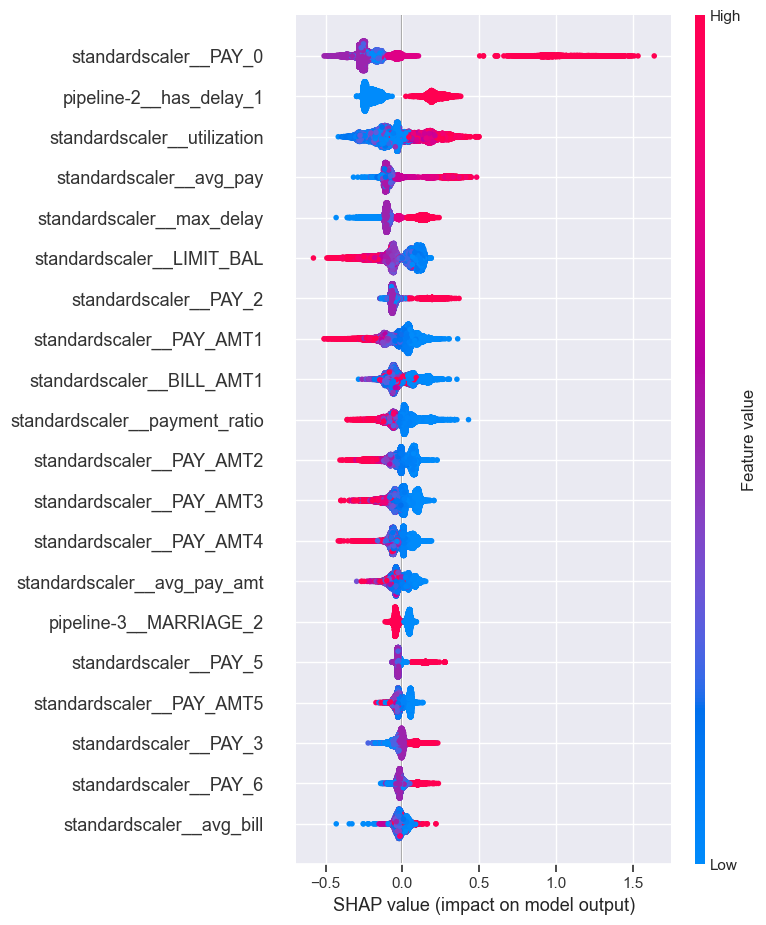

In [42]:
# Assuming your model is stored in a pipeline (e.g., pipe_cb)
model = pipeline_cb_mean.named_steps['cb']  # Extract the trained model from the pipeline

# Create a SHAP explainer (for tree-based models)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the dataset (use the training data or test data)
shap_values = explainer.shap_values(X_train_scaled)

# Plot a summary plot to visualize the feature importance
shap.summary_plot(shap_values, X_train_scaled)

- The CatBoost model’s built-in feature importances and the SHAP values both indicate that recent payment statuses (PAY_0, PAY_1, PAY_2, ...) are the most influential features in predicting the outcome.
- Other high-impact features include the credit limit (limit_bal), recent bill amounts (BILL_AMT1, BILL_AMT2), and recent payment amounts (PAY_AMT1, PAY_AMT2, PAY_AMT3).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [43]:
y_pred = pipeline_cb_mean.predict(X_test)
y_pred_proba = pipeline_cb_mean.predict_proba(X_test)

print(y_pred)
print(y_pred_proba)

[0 0 1 ... 1 1 1]
[[0.66434743 0.33565257]
 [0.70710595 0.29289405]
 [0.09024497 0.90975503]
 ...
 [0.37129822 0.62870178]
 [0.47048912 0.52951088]
 [0.15541811 0.84458189]]


In [44]:
test_accuracy_score = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred)

print(f"Accuracy: {test_accuracy_score:.4f}")
print(f"F1 Score: {test_f1_score:.4f}\n")

Accuracy: 0.7520
F1 Score: 0.5259



In [45]:
catboost_model = pipeline_cb_mean.named_steps['cb']

# Create a SHAP explainer
explainer = shap.TreeExplainer(catboost_model)

# Transform the test data through the preprocessor only
X_test_preprocessed = pipeline_cb_mean.named_steps['preprocessor'].transform(X_test)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_preprocessed)

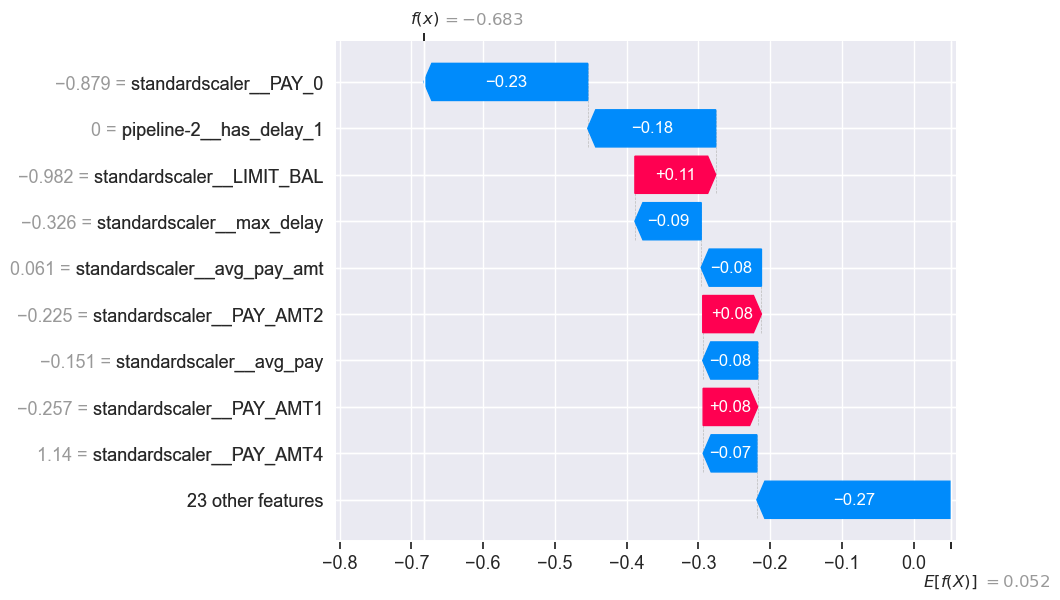

In [46]:
sample_index = 0
sample_data = X_test_preprocessed[sample_index]

# Create the SHAP Explanation object needed for the waterfall plot
shap_explanation = shap.Explanation(
    values=shap_values[sample_index],
    base_values=explainer.expected_value,
    data=sample_data,
    feature_names=feature_names
)

# Generate the waterfall plot
shap.plots.waterfall(shap_explanation)

# If running outside of interactive environments, display the plot
plt.show()

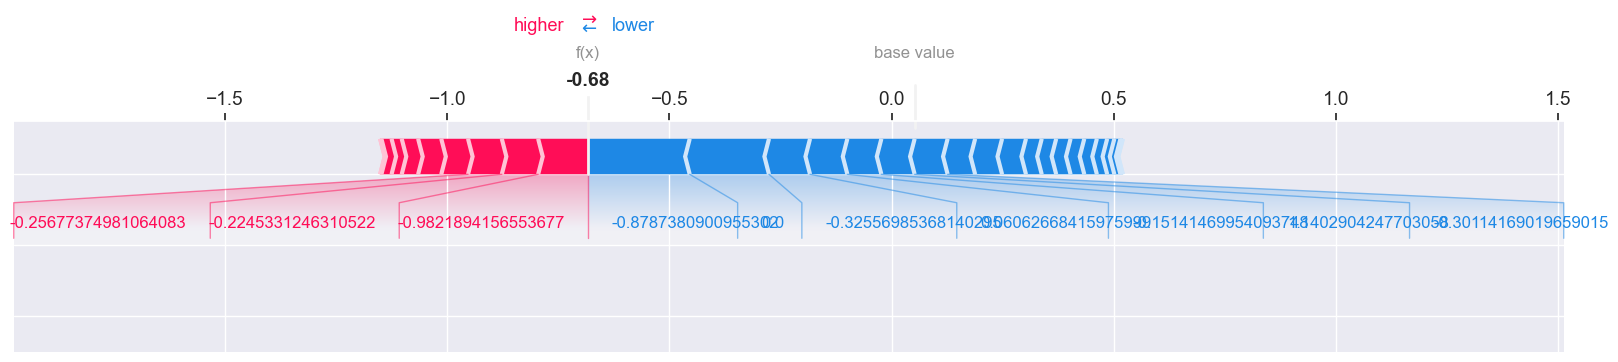

In [47]:
shap.initjs()
shap.force_plot(
    explainer.expected_value, 
    shap_values[sample_index], 
    sample_data, 
    matplotlib=True  # or use `js=True` for interactive Jupyter output
)

### Comparison of Cross-Validation vs. Test Metrics

| Scoring | Accuracy | F1-Score |
|-------|-----------|--------|
| CV     |0.7619      |  0.5862     | 
| Test     | 0.7520      |  0.5259     |

### Interpreting the Differences

- Accuracy: The drop from ~76.2% (CV) to ~75.2% (test) is only about 1 percentage point, which is relatively small and could be normal variance. Some discrepancy between cross-validation metrics and final test metrics is typical because each sample (training fold vs. test) may have different distributions.
- F1 Score: The difference is a bit larger, about 6% (from 58.6% to 52.6%). That is a more noticeable gap and suggests the model might be slightly underperforming on the test set compared to what the cross-validation suggested. The test set performance might fall on the lower side of that range but it's not a significant gap of 15 or 20 so it is acceptable.
- It could be that the test set is not perfectly representative of the data we used for cross-validation leading to a lower F1 score.
- For the accuracy, the small difference (1%) indicates that overall class predictions are not drastically different from our cross-validation but F1 is more sensitive to class imbalance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

#### **Summary Table**

In [48]:
results = {
    'best model': ['CatBoost'],
    'most influential feature': ['payment_delays'],
    'test accuracy': [0.7520],
    'test F1 Score': [0.5259],
    'validation accuracy': [0.7619],
    'validation F1 Score': [0.5862]
}
results = pd.DataFrame(results).T

In [49]:
results

,0
best model,CatBoost
most influential feature,payment_delays
test accuracy,0.752
test F1 Score,0.5259
validation accuracy,0.7619
validation F1 Score,0.5862


#### **Summary**

#### 1. Picking Problem
* We chose the problem "Classification problem of predicting whether a credit card client will default or not."
* The original data we have contains information about clients' Amount of given credit (`LIMIT_BAL`), Gender (`SEX`), Education level (`EDUCATION`), Marital status (`MARRIAGE`), Repayment status (`PAY_N`; N = [0, 6]), and a total of 25 variables, 1 of which is ID and 1 of which is our target variable default.payment.next.month, which is binary, 1=yes and 0=no.
#### 2. Train Test Split
* We split our original dataset with a 70-30 split
#### 3. EDA
* We found that `PAY_` and `BILL_AMT` features are highly correleated with themselves
#### 4. Feature Engineering
* We created 6 new features: `avg_pay_time`, `has_delay`, `avg_bill`, `avg_pay_amt`, `utilization`, `payment_ratio`
#### 5. Preprocessing and transformations
* We conducted extensive preprocessing on `EDUCATION` feature to remove unknown values and reorder the feature to accurately represent education levels 
#### 6. Baseline models
* We used `DummyClassifier` and `DecisionTreeClassifier`
* Best model `DummyClassifier` had train and cv score of 0.77 and f1 score of 0
#### 7. Linear models
* We used `LogisticRegression` and `SVM Linear`
* Best model `LogisticRegression` had train and cv score of 0.81 and f1 score of 0.42
#### 8. Different models
* We used `Random Forest`, `CatBoost` and `SVM`
* Best model `CatBoost` had train score of 0.86, cv score of 0.81, train_f1 score of 0.60 and test_f1 score of 0.47
#### 9. Feature selection
* We used `RFECV` on `LogisticRegression` (best model from "Linear Models") and `CatBoost` (best model from "Different Models")
* Achieved worse/similar results compared to without using RFECV
#### 10. Hyperparameter Optimization
* We decided from onwards to use class_weight="balanced", because we prioritize recall (less False Negative) considering our problem descriptions
* We used `RandomSearchCV` and `BayesianSearchCV`
* Best hyperparameters found using `RandomSearchCV`:
  - For `CatBoost`:  {`depth`: 5, `iterations`: 150, `l2_leaf_reg`: 3, `learning_rate`: 0.1}
  - For `LogisticRegression`: {`C`: 0.01}
* Best hyperparameters found using `BayesianSearchCV`:
  - For `CatBoost`:  {`depth`: 6, `iterations`: 100, `l2_leaf_reg`: 1, `learning_rate`: 0.05}
  - For `LogisticRegression`: {`C`: 0.01}
#### 11. Feature importance
* From onwards we decide to use CatBoost based on analysis from previous steps
* We used `SKLearn FeatureImportance` and `SHAP`
* Most important features found using `SKLearn`:
  - (Standard Scaler applied to all of these features:) `PAY_0`, `has_delay`, `utilization`, `LIMIT_BAL`, `payment_ratio`, `BILL_AMT1`, `avg_pay`, `PAY_AMT1`
* Most important features (series of features) found using `SHAP`:
  - (Standard Scaler applied to all of these features:) `PAY_`, `BILL_AMT`, `PAY_AMT`
#### 12. Results on the test set (differences)
* Accuracy: The drop from ~76.2% (CV) to ~75.2% (test) is only about 1 percentage point, which is relatively small and could be normal variance. Some discrepancy between cross-validation metrics and final test metrics is typical because each sample (training fold vs. test) may have different distributions.
* F1 Score: The difference is a bit larger, about 6% (from 58.6% to 52.6%). That is a more noticeable gap and suggests the model might be slightly underperforming on the test set compared to what the cross-validation suggested. The test set performance might fall on the lower side of that range but it's not a significant gap of 15 or 20 so it is acceptable.
* It could be that the test set is not perfectly representative of the data we used for cross-validation leading to a lower F1 score.
* For the accuracy, the small difference (1%) indicates that overall class predictions are not drastically different from our cross-validation but F1 is more sensitive to class imbalance.

#### **Closing Remarks**
We received worse accuracy results after applying further steps outside of preprocessing and applying the model (cv score 0.81 vs 0.75). That said, we achieved a good 10% increase of f1 score (0.42 vs 0.52).<br>
**It is important to note that our model prioritizes f1 score and not accuracy score.** <br>
The above information tells us that there may be a hidden tradeoff relationship between cv score and f1 score

#### **Other ideas we did not use**

The most important things we could have done in this assignment to improve our results are:
* Use more models, such as `XGBoost`, `LightBGM`, `Voting`, `Stacking`, etc.
* Use more models for RFECV instead of exclusively using LogisticRegression
* Apply less limits to our models and other settings (Ex. Changing `max_iter` hyperparameter to a higher value or removing it completely)

**As we can see, the biggest issue we ran into in terms of improving our models was we did not have much time. That said, the extent of how accurate the models would remained to be connected to their f1 score, since there might be a hidden tradeoff relationship between cv score and f1, as stated in our Closing Remarks**
>
#### **Further Ideas we did not use:**
1. We could have dropped `BILL_AMT` features as they were highly correlated with themselves. This would probably increase the performance/speed of the models considerably, but may worsen the accuracy or f1 score of our models, since Feature Importance using `SHAP`(step 11) showed that `BILL_AMT` features have considerable importance

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Our key learning from supervised machine learning is how critical it is to know the data, problem, and context. If one doesn't know the structure of the data and the relations between them, one cannot choose a correct model and design sensible features. It is an iterative process, and this knowledge informs model choice, evaluation, and hyperparameter optimization. Further, models with very long training times make debugging very difficult, and we should not evaluate performance based on accuracy alone - it is important to balance F1 score and accuracy since improvements in F1 might be at the expense of accuracy.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)